In [9]:
# Cell 1: Imports
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import CCA

import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully")



Libraries imported successfully


In [2]:
# Cell 2: Load PPG features
DATA_PATH = "../Data/processed/ppg_features.csv"
df = pd.read_csv(DATA_PATH)

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (1158, 13)


,subject_id,activity,hr_bpm,hrv,peak_count,R_ratio,red_ac,ir_ac,ppg_mean,ppg_std,ppg_rms,ppg_energy,ppg_entropy
0,s12,run,99.709182,0.007644,9,1.580212,98.586438,256.296416,-1.116858,68.371286,68.380407,1.168347e+07,1.845303
1,s12,run,100.190840,0.011256,8,1.036670,91.672293,219.962447,2.855715,59.774673,59.842850,8.966132e+06,2.225075
2,s12,run,93.541203,0.036374,8,1.550534,93.461807,202.217577,2.343746,59.500541,59.546683,8.871155e+06,1.778282
3,s12,run,86.248203,0.019813,7,1.098686,85.358685,185.129674,-2.086325,58.417425,58.454669,8.546416e+06,1.426971
4,s12,run,85.836910,0.017000,7,-0.962195,73.637724,182.366085,-0.376455,58.327658,58.328873,8.499200e+06,1.274032


In [6]:
# Cell 3: Define features (X) and targets (y)
# Cell 3: Separate features and targets
X = df.drop(columns=["subject_id", "activity", "hr_bpm", "R_ratio"])
Y = df[["hr_bpm", "R_ratio"]]

print("PPG feature matrix shape:", X.shape)
print("Target matrix shape:", Y.shape)
print("PPG feature names:", list(X.columns))


PPG feature matrix shape: (1158, 9)
Target matrix shape: (1158, 2)
PPG feature names: ['hrv', 'peak_count', 'red_ac', 'ir_ac', 'ppg_mean', 'ppg_std', 'ppg_rms', 'ppg_energy', 'ppg_entropy']


In [7]:
# Cell 4: Standardize features
# Cell 4: Standardization
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y)

print("X and Y standardized")



X and Y standardized


In [10]:
#cca
# Cell 5: Fit CCA
cca = CCA(n_components=2)
cca.fit(X_scaled, Y_scaled)

X_c, Y_c = cca.transform(X_scaled, Y_scaled)

print("CCA applied successfully")


CCA applied successfully


In [11]:
# Cell 6: Compute feature importance
cca_weights = np.abs(cca.x_weights_)

importance = cca_weights.mean(axis=1)

feature_importance = pd.DataFrame({
    "feature": X.columns,
    "importance": importance
}).sort_values(by="importance", ascending=False)

feature_importance


,feature,importance
6,ppg_rms,0.446158
5,ppg_std,0.394413
2,red_ac,0.315404
1,peak_count,0.289454
3,ir_ac,0.262036
7,ppg_energy,0.173201
4,ppg_mean,0.037033
8,ppg_entropy,0.022271
0,hrv,0.014888


C:\Users\n\AppData\Local\Temp\ipykernel_6924\1540352124.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\n\AppData\Local\Temp\ipykernel_6924\1540352124.py:12: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


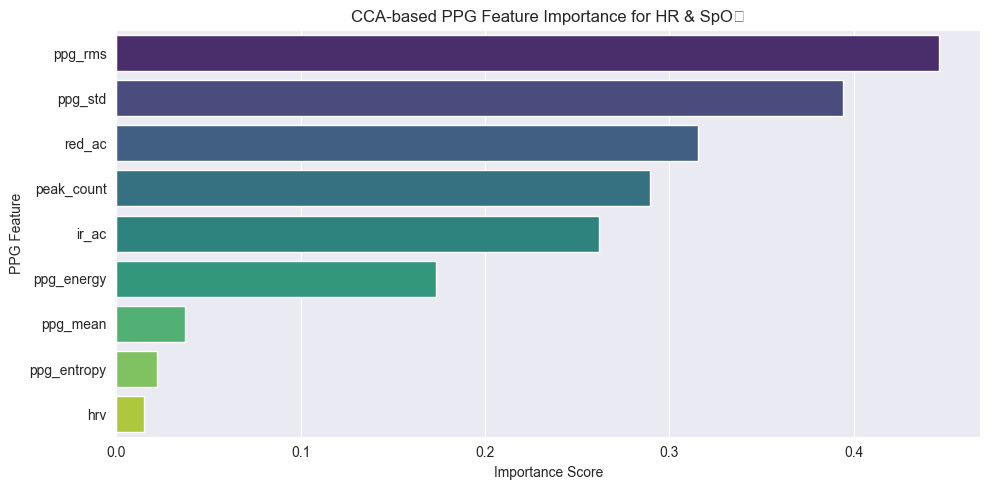

In [12]:
# Cell 7: Plot feature importance
plt.figure(figsize=(10,5))
sns.barplot(
    x="importance",
    y="feature",
    data=feature_importance,
    palette="viridis"
)
plt.title("CCA-based PPG Feature Importance for HR & SpO₂")
plt.xlabel("Importance Score")
plt.ylabel("PPG Feature")
plt.tight_layout()
plt.show()


In [13]:
# Cell 8: Select top features
TOP_K = 5
selected_features = feature_importance.head(TOP_K)["feature"].tolist()

print("Selected PPG features for physiological MLP:")
selected_features


Selected PPG features for physiological MLP:


['ppg_rms', 'ppg_std', 'red_ac', 'peak_count', 'ir_ac']